In [45]:
import zipfile
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [46]:
zip_path = "/content/BusinessAnalyst.csv.zip"
extract_path = "/mnt/data/extracted_data"

RANDOM_STATE = 42
TEST_SIZE = 0.2

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [47]:
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
csv_path = os.path.join(extract_path, csv_files[0])

df = pd.read_csv(csv_path)


In [5]:
print("Data Preview:")
print(df.head(), "\n")




Data Preview:
  Unnamed: 0 index                                         Job Title  \
0          0     0  Business Analyst - Clinical & Logistics Platform   
1          1     1                                  Business Analyst   
2          2     2                                      Data Analyst   
3          3     3   Information Security Analyst, Incident Response   
4          4     4                     Analyst - FP&A Global Revenue   

               Salary Estimate  \
0  $56K-$102K (Glassdoor est.)   
1  $56K-$102K (Glassdoor est.)   
2  $56K-$102K (Glassdoor est.)   
3  $56K-$102K (Glassdoor est.)   
4  $56K-$102K (Glassdoor est.)   

                                     Job Description Rating  \
0  Company Overview\n\n\nAt Memorial Sloan Ketter...    3.9   
1  We are seeking for an energetic and collaborat...    3.8   
2  For more than a decade, Asembia has been worki...    3.6   
3  Job Description Summary\nThe Information Secur...    3.6   
4  Magnite is the world's largest

In [6]:
print("Columns:\n" + "\n".join(df.columns))


Columns:
Unnamed: 0
index
Job Title
Salary Estimate
Job Description
Rating
Company Name
Location
Headquarters
Size
Founded
Type of ownership
Industry
Sector
Revenue
Competitors
Easy Apply


In [7]:
print("Shape:", df.shape)

Shape: (4092, 17)


In [8]:
print("Info:")
print(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4092 non-null   object
 1   index              4092 non-null   object
 2   Job Title          4092 non-null   object
 3   Salary Estimate    4092 non-null   object
 4   Job Description    4092 non-null   object
 5   Rating             4092 non-null   object
 6   Company Name       4092 non-null   object
 7   Location           4092 non-null   object
 8   Headquarters       4092 non-null   object
 9   Size               4092 non-null   object
 10  Founded            4092 non-null   object
 11  Type of ownership  4092 non-null   object
 12  Industry           4092 non-null   object
 13  Sector             4092 non-null   object
 14  Revenue            4092 non-null   object
 15  Competitors        3692 non-null   object
 16  Easy Apply         3692 non-null   o

In [9]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
              Unnamed: 0                        index         Job Title  \
count               4092                         4092              4092   
unique              3962                         3706              2210   
top     Business Analyst  $60K-$109K (Glassdoor est.)  Business Analyst   
freq                  16                           30               502   

                   Salary Estimate Job Description            Rating  \
count                         4092            4092              4092   
unique                         167            3732                41   
top     $48K-$87K (Glassdoor est.)       Citi\n3.7  Jacksonville, FL   
freq                            60              22               392   

                                 Company Name       Location Headquarters  \
count                                    4092           4092         4092   
unique                                   2197            218          625   
top     Sta

In [24]:
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

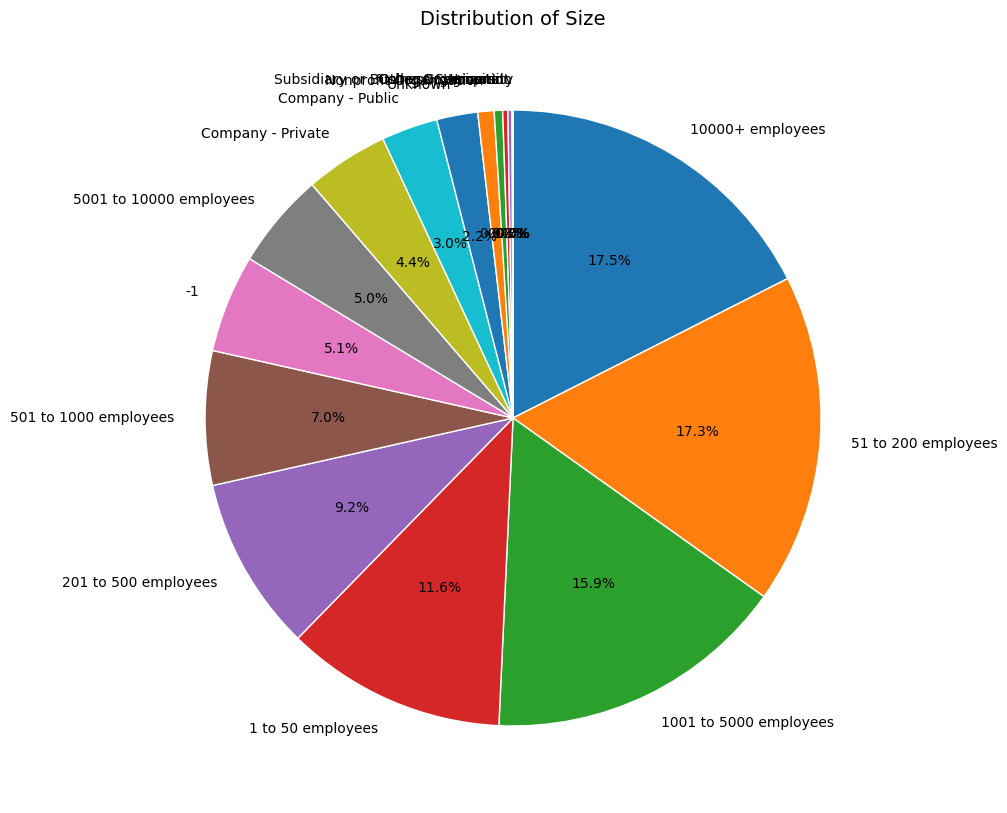

In [12]:
category_counts = df["Size"].value_counts()
plt.figure(figsize=(15,10))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'white'}
)
plt.title(f"Distribution of Size", fontsize=14)
plt.show()

In [13]:
industry_col = 'Industry'
salary_col = 'Salary Estimate'
df = df[["Industry","Salary Estimate" ]].dropna()
sns.set(style="whitegrid")

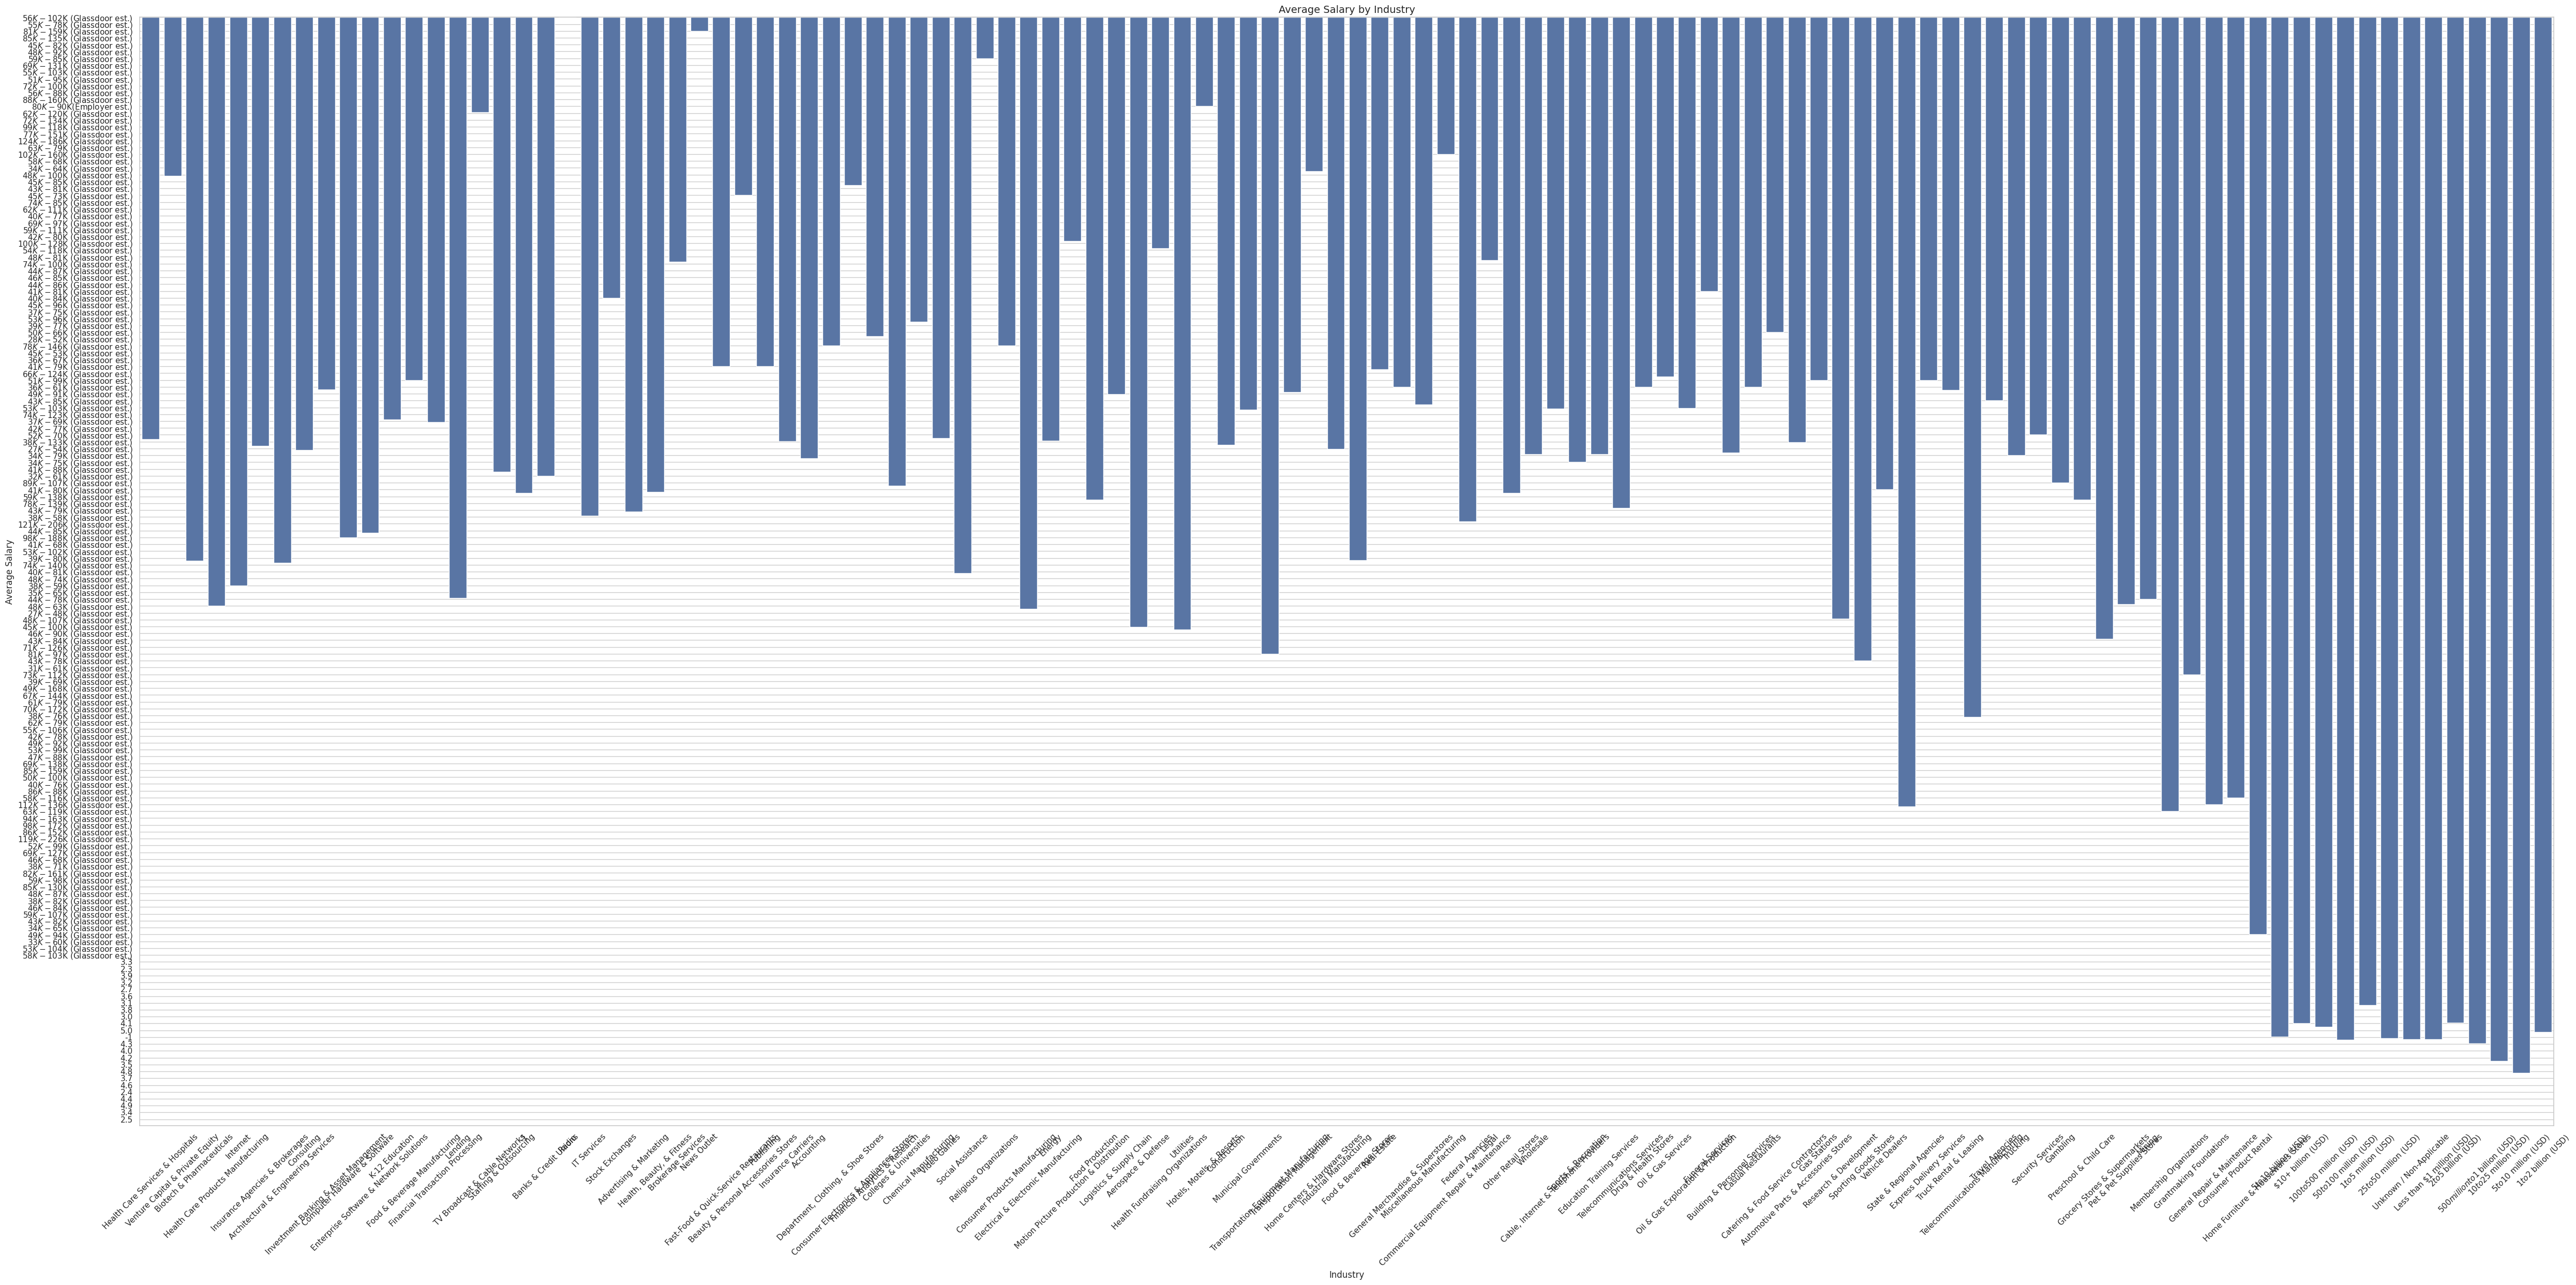

In [48]:
plt.figure(figsize=(50,25))
sns.barplot(data=df, x=industry_col, y=salary_col, estimator='mean', errorbar=None)
plt.title("Average Salary by Industry", fontsize=14)
plt.xlabel("Industry")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
job_col = 'Job Title'
salary_col = 'Salary Estimate'
rating_col = 'Rating'

df = pd.read_csv("/content/BusinessAnalyst.csv.zip")

df = df[["Job Title", "Salary Estimate", "Rating"]].dropna()

In [17]:
df["Salary Estimate"] = df["Salary Estimate"].astype(str).str.extract(r'\$(\d+)K-\$(\d+)K').astype(float).mean(axis=1)
df["Rating"] = pd.to_numeric(df["Rating"], errors='coerce')
df = df.dropna(subset=["Salary Estimate","Rating"])
print("\nCleaned DataFrame Head:")
print(df.head())


Cleaned DataFrame Head:
                                          Job Title  Salary Estimate  Rating
0  Business Analyst - Clinical & Logistics Platform             79.0     3.9
1                                  Business Analyst             79.0     3.8
2                                      Data Analyst             79.0     3.6
3   Information Security Analyst, Incident Response             79.0     3.6
4                     Analyst - FP&A Global Revenue             79.0     3.4


In [18]:
job_summary = df.groupby("Job Title")[["Salary Estimate", "Rating"]].mean().reset_index()
job_summary['score'] = job_summary["Salary Estimate"] * job_summary["Rating"]
top_jobs = job_summary.sort_values('score', ascending=False).head(10)

In [19]:
print("\nTop 10 Best Jobs by Salary and Rating:")
print(top_jobs)


Top 10 Best Jobs by Salary and Rating:
                                              Job Title  Salary Estimate  \
1775                 Tableau Developer/Business Analyst            172.5   
1833            Urgent - Business Analyst - Entry Level            163.5   
1587                             Senior HR Data Analyst            172.5   
599              Business Systems Analyst, SAP Treasury            172.5   
192                         Business Analyst - Commerce            172.5   
1786         Technical Business Analyst or Data Analyst            172.5   
1331                           Product/Business Analyst            172.5   
1512  Senior Business Analyst (Customer Success) - R...            172.5   
318    Business Analyst with Zuora Billing subscription            172.5   
834                           E-Business System Analyst            172.5   

      Rating  score  
1775     4.8  828.0  
1833     5.0  817.5  
1587     4.6  793.5  
599      4.4  759.0  
192      4.4 

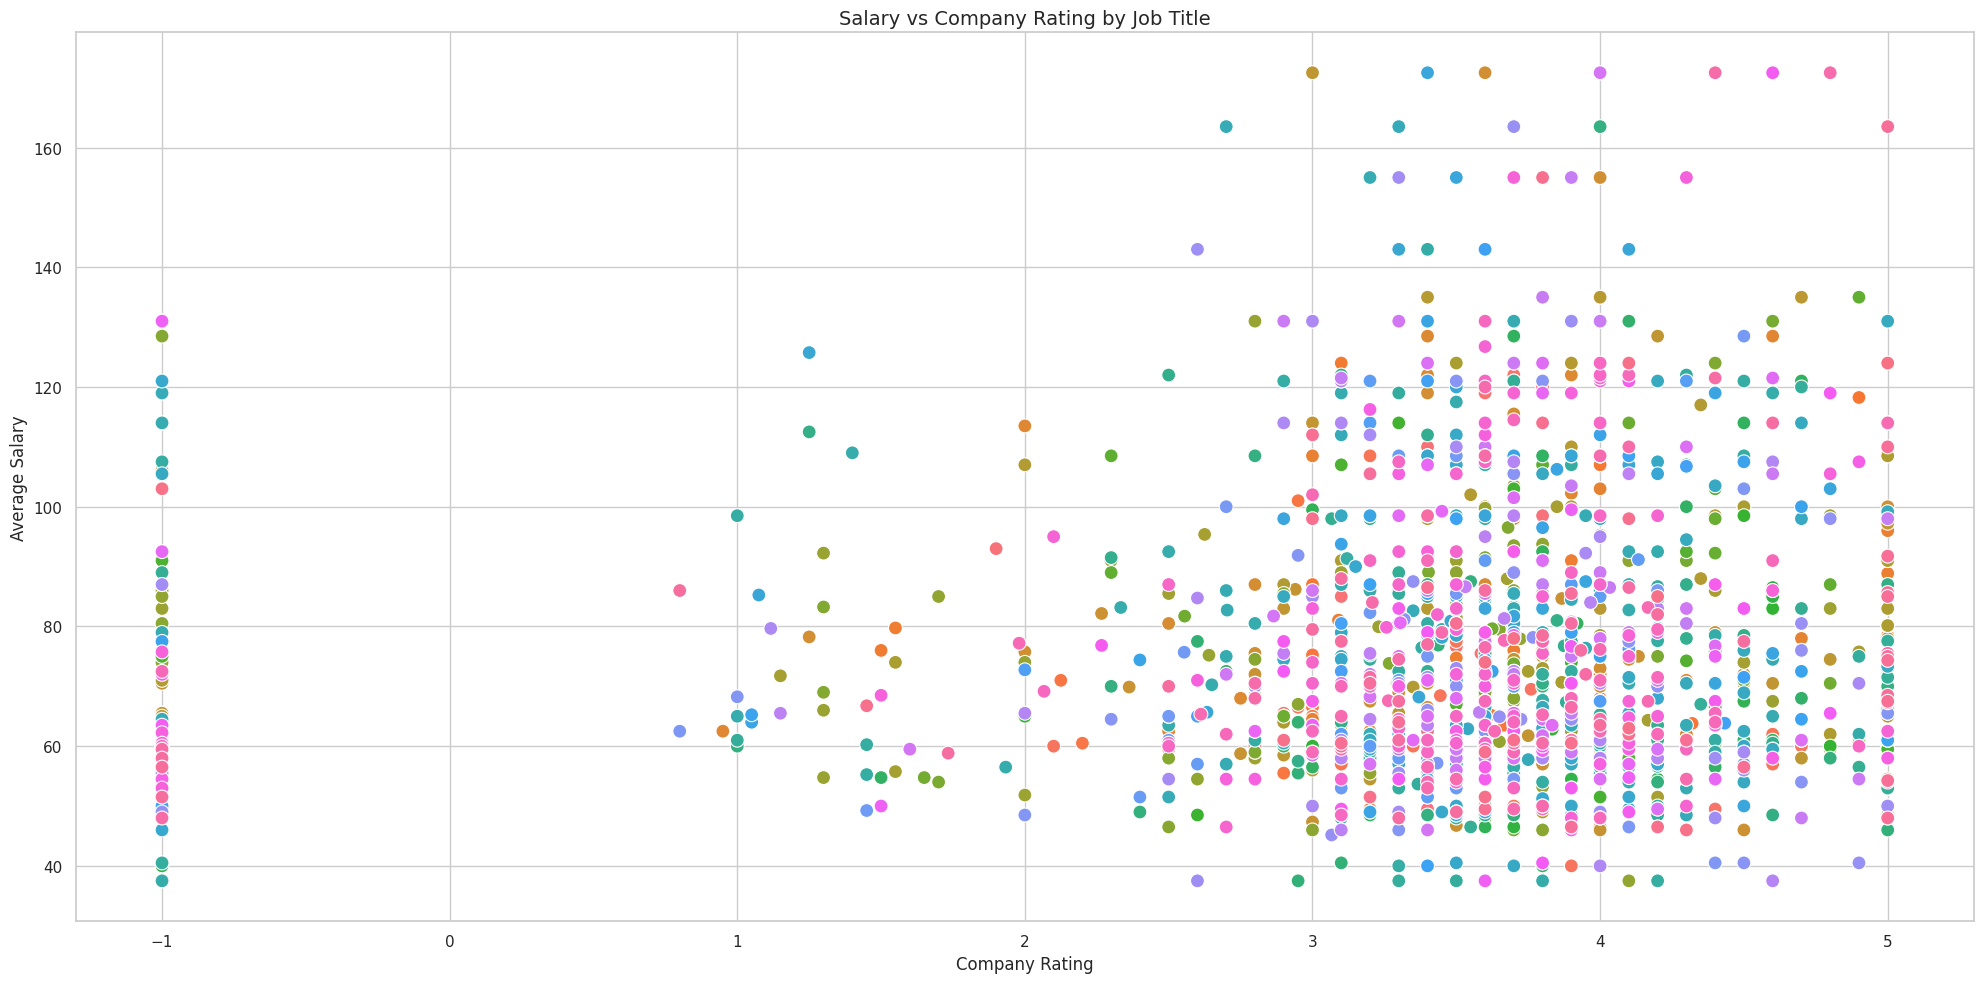

In [22]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=job_summary, x=rating_col, y=salary_col, hue=job_col, s=100, legend=False)
plt.title("Salary vs Company Rating by Job Title", fontsize=14)
plt.xlabel("Company Rating")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.show()

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.drop(columns=[salary_col])
y = df[salary_col].values


categorical_features = ['Job Title']
numerical_features = ['Rating']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [36]:
print("\nModel evaluation on test set:")
print(f"  R² Score : {r2:.4f}")
print(f"  MAE      : {mae:.4f}")
print(f"  MSE      : {mse:.4f}")
print(f"  RMSE     : {rmse:.4f}")


Model evaluation on test set:
  R² Score : -0.0538
  MAE      : 20.4799
  MSE      : 728.7593
  RMSE     : 26.9955


In [39]:

onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features)
numerical_feature_names = numerical_features
feature_names = list(onehot_feature_names) + numerical_feature_names

coefs = model.coef_
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefs})
coef_df = coef_df.reindex(coef_df.coefficient.abs().sort_values(ascending=False).index)
print("\nTop coefficients (absolute value):")
print(coef_df.head(20).to_string(index=False))


Top coefficients (absolute value):
                                                                                                    feature  coefficient
                                                        Job Title_Business Analyst with B2B E-Commerce Exp.    97.246974
                                                                          Job Title_Business Analyst - OLFM    97.168727
                                                             Job Title_Business Analyst - Occupier Products    97.155686
                                                 Job Title_Business Analyst with Zuora Billing subscription    97.116563
                                                                         Job Title_Product/Business Analyst    97.116563
                                Job Title_Senior Business Analyst (Customer Success) - Remote / Telecommute    97.116563
                                                                      Job Title_Business Analyst - Commerce    97.064

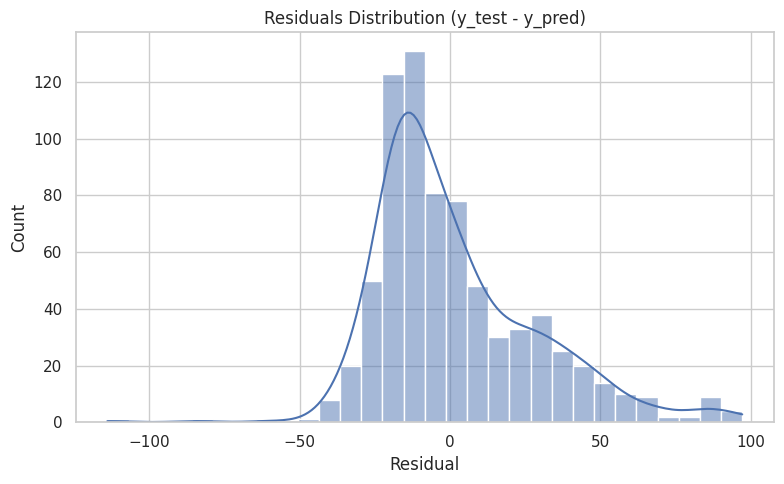

In [40]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution (y_test - y_pred)")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


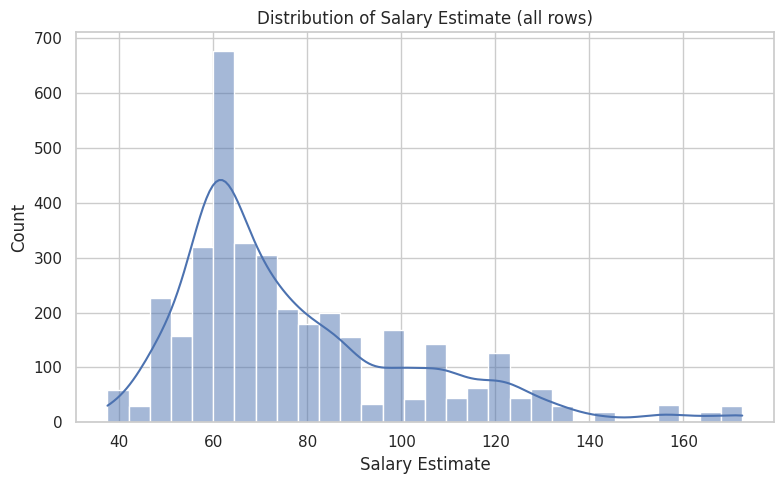

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(df[salary_col], kde=True, bins=30)
plt.title(f"Distribution of {salary_col} (all rows)")
plt.xlabel(salary_col)
plt.ylabel("Count")
plt.tight_layout()
plt.show()


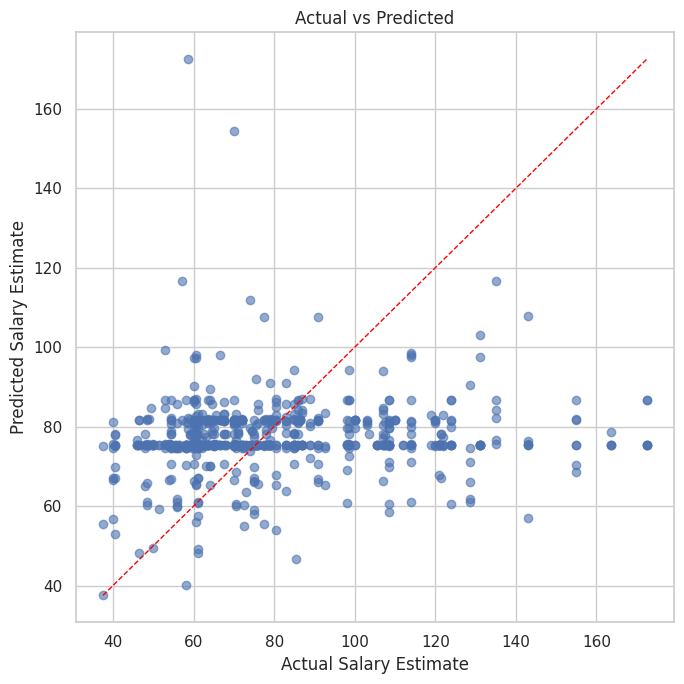

In [43]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.6)
lim_min = min(min(y_test), min(y_pred))
lim_max = max(max(y_test), max(y_pred))
plt.plot([lim_min, lim_max], [lim_min, lim_max], color='red', linestyle='--', linewidth=1)
plt.xlabel("Actual " + salary_col)
plt.ylabel("Predicted " + salary_col)
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()

In [44]:
inspect_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'residual': residuals
})
inspect_df_sorted = inspect_df.reindex(inspect_df.residual.abs().sort_values(ascending=False).index)
print("\nTop 10 largest absolute residuals (inspect):")
print(inspect_df_sorted.head(10).to_string(index=False))



Top 10 largest absolute residuals (inspect):
 actual  predicted    residual
   58.5 172.500061 -114.000061
  172.5  75.305254   97.194746
  172.5  75.383496   97.116504
  172.5  75.461737   97.038263
  172.5  75.487818   97.012182
  163.5  75.248194   88.251806
  163.5  75.344375   88.155625
  163.5  75.344375   88.155625
  155.0  68.589285   86.410715
  143.0  56.999406   86.000594
